# Simple DQN agent

The notebook provides a quick training of DQN algorithm on the `WaterDistributionSystemEnv` environment.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from gymnasium.utils.env_checker import check_env
import gymnasium as gym

from gym4real.envs.wds.utils import parameter_generator

from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from gym4real.envs.wds.env import WaterDistributionSystemEnv

In [40]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context("paper")
plot_colors = sns.color_palette('colorblind')
sns.set(font_scale=1.2)

alg_color = OrderedDict({
    'random': plot_colors[1],
    'dqn': plot_colors[0],
})

## DQN Agent
We are adopting the Stable-Baselines 3 version of DQN

Here we initialize both the environment for training the agent and the environment to evaluate the agent. Indeed, the evaluation is done on an environment which presents different consumption profiles. The evaluation is done on 5 profiles.

In [22]:
n_episodes = 10
n_envs = 1

In [24]:
params = parameter_generator(hydraulic_step=3600, duration=3600*24*7, seed=42)
env = make_vec_env('gym4real/wds-v0', n_envs=n_envs, env_kwargs={'settings':params})

/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/envs/registration.py:734: UserWarning: WARN: The environment is being initialised with render_mode='rgb_array' that is not in the possible render_modes ([]).
  logger.warn(
/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [28]:
model = DQN("MlpPolicy", env)
model.learn(total_timesteps=env.get_attr('_duration')[0] * n_episodes / 3600, 
            progress_bar=True)
model.save('DQN_model')

Output()

Resetting the environment...


Resetting the environment...

## Comparison with Random policy
Here we will compare the DQN model saved with a simple random policy. The policies will be compared on several test profiles and a different seed wrt the train.

In [43]:
eval_params = parameter_generator(hydraulic_step=3600, duration=3600*24*7, seed=1234)
env = gym.make(id="gym4real/wds-v0", **{'settings':eval_params})
n_episodes = 20
rewards = {}

/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


### Random Policy
The action is chosen randomly at each decision step.

In [46]:
alg = 'random'
rewards[alg] = {}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset(options={'is_evaluation': True})
    done = False
    cumulated_reward = 0
    rewards[alg][episode] = []
    
    while not done:
        action = env.action_space.sample()  # Randomly select an action
        obs, reward, terminated, truncated, info = env.step(action)  
        done = terminated or truncated
        cumulated_reward += reward
        rewards[alg][episode].append(cumulated_reward)

  0%|                                                    | 0/20 [00:00<?, ?it/s]

Resetting the environment...


  5%|██▏                                         | 1/20 [00:40<12:46, 40.33s/it]

Resetting the environment...


 10%|████▍                                       | 2/20 [01:26<13:08, 43.81s/it]

Resetting the environment...


 15%|██████▌                                     | 3/20 [02:12<12:44, 44.95s/it]

Resetting the environment...


 20%|████████▊                                   | 4/20 [02:58<12:04, 45.30s/it]

Resetting the environment...


 25%|███████████                                 | 5/20 [03:41<11:06, 44.45s/it]

Resetting the environment...


/Users/kavish/Documents/Bath/Units/Reinforcement Learning 1/Coursework/Environment-Local/gym4ReaL/gym4real/envs/wds/simulator/epynet/epanet2.py:683: UserWarning: WARNING: System may be hydraulically unstable.
  warnings.warn(self.ENgeterror(ierr))
 30%|█████████████▏                              | 6/20 [04:25<10:19, 44.28s/it]

Resetting the environment...


 35%|███████████████▍                            | 7/20 [05:14<09:55, 45.78s/it]

Resetting the environment...


 40%|█████████████████▌                          | 8/20 [06:07<09:35, 47.98s/it]

Resetting the environment...


 45%|███████████████████▊                        | 9/20 [06:52<08:39, 47.22s/it]

Resetting the environment...


 50%|█████████████████████▌                     | 10/20 [07:37<07:45, 46.50s/it]

Resetting the environment...


 55%|███████████████████████▋                   | 11/20 [08:24<06:59, 46.65s/it]

Resetting the environment...


 60%|█████████████████████████▊                 | 12/20 [09:09<06:09, 46.15s/it]

Resetting the environment...


 65%|███████████████████████████▉               | 13/20 [09:58<05:29, 47.03s/it]

Resetting the environment...


 70%|██████████████████████████████             | 14/20 [10:43<04:38, 46.39s/it]

Resetting the environment...


/Users/kavish/Documents/Bath/Units/Reinforcement Learning 1/Coursework/Environment-Local/gym4ReaL/gym4real/envs/wds/simulator/epynet/epanet2.py:683: UserWarning: WARNING: Pumps cannot deliver enough flow or head.
  warnings.warn(self.ENgeterror(ierr))
 75%|████████████████████████████████▎          | 15/20 [11:29<03:51, 46.26s/it]

Resetting the environment...


 80%|██████████████████████████████████▍        | 16/20 [12:14<03:03, 45.97s/it]

Resetting the environment...


 85%|████████████████████████████████████▌      | 17/20 [13:14<02:30, 50.20s/it]

Resetting the environment...


 90%|██████████████████████████████████████▋    | 18/20 [14:01<01:38, 49.13s/it]

Resetting the environment...


 95%|████████████████████████████████████████▊  | 19/20 [14:44<00:47, 47.24s/it]

Resetting the environment...


100%|███████████████████████████████████████████| 20/20 [15:44<00:00, 47.24s/it]


### DQN agent
Here we load the previously trained model `DQN_quick`.

In [49]:
env = make_vec_env("gym4real/wds-v0", n_envs=1, env_kwargs={'settings':eval_params})

alg = 'dqn'
rewards[alg] = {}

model = DQN('MlpPolicy', env, verbose=1)
vec_env = model.get_env()
model = DQN.load("DQN_model")

for episode in tqdm(range(n_episodes)):
    vec_env.set_options({'is_evaluation': True})
    obs = vec_env.reset()

    cumulated_reward = 0
    rewards[alg][episode] = []
    done = False
    
    while not done:
        action, _states = model.predict(obs)
        obs, r, dones, info = vec_env.step(action)
        done = dones[0]
        cumulated_reward += r[0]
        rewards[alg][episode].append(cumulated_reward)

/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/envs/registration.py:734: UserWarning: WARN: The environment is being initialised with render_mode='rgb_array' that is not in the possible render_modes ([]).
  logger.warn(
/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/kavish/opt/anaconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Using cpu device


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Resetting the environment...


  5%|██▏                                         | 1/20 [01:14<23:33, 74.37s/it]

Resetting the environment...
Resetting the environment...


 10%|████▍                                       | 2/20 [02:23<21:26, 71.48s/it]

Resetting the environment...
Resetting the environment...


 15%|██████▌                                     | 3/20 [03:33<20:02, 70.73s/it]

Resetting the environment...
Resetting the environment...


 20%|████████▊                                   | 4/20 [04:48<19:16, 72.30s/it]

Resetting the environment...
Resetting the environment...


 25%|███████████                                 | 5/20 [05:52<17:18, 69.24s/it]

Resetting the environment...
Resetting the environment...


 30%|█████████████▏                              | 6/20 [06:41<14:35, 62.55s/it]

Resetting the environment...
Resetting the environment...


 35%|███████████████▍                            | 7/20 [07:50<13:59, 64.56s/it]

Resetting the environment...
Resetting the environment...


 40%|█████████████████▌                          | 8/20 [08:51<12:42, 63.58s/it]

Resetting the environment...
Resetting the environment...


 45%|███████████████████▊                        | 9/20 [09:40<10:47, 58.87s/it]

Resetting the environment...
Resetting the environment...


 50%|█████████████████████▌                     | 10/20 [10:44<10:06, 60.62s/it]

Resetting the environment...
Resetting the environment...


 55%|███████████████████████▋                   | 11/20 [11:52<09:24, 62.70s/it]

Resetting the environment...
Resetting the environment...


 60%|█████████████████████████▊                 | 12/20 [12:54<08:19, 62.48s/it]

Resetting the environment...
Resetting the environment...


 65%|███████████████████████████▉               | 13/20 [14:08<07:41, 65.96s/it]

Resetting the environment...
Resetting the environment...


 70%|██████████████████████████████             | 14/20 [15:10<06:29, 64.96s/it]

Resetting the environment...
Resetting the environment...


 75%|████████████████████████████████▎          | 15/20 [16:22<05:33, 66.79s/it]

Resetting the environment...
Resetting the environment...


 80%|██████████████████████████████████▍        | 16/20 [17:05<03:59, 59.85s/it]

Resetting the environment...
Resetting the environment...


 85%|████████████████████████████████████▌      | 17/20 [18:09<03:02, 60.91s/it]

Resetting the environment...
Resetting the environment...


 90%|██████████████████████████████████████▋    | 18/20 [18:48<01:48, 54.45s/it]

Resetting the environment...
Resetting the environment...


 95%|████████████████████████████████████████▊  | 19/20 [20:04<01:00, 60.82s/it]

Resetting the environment...
Resetting the environment...


100%|███████████████████████████████████████████| 20/20 [21:19<00:00, 63.98s/it]

Resetting the environment...


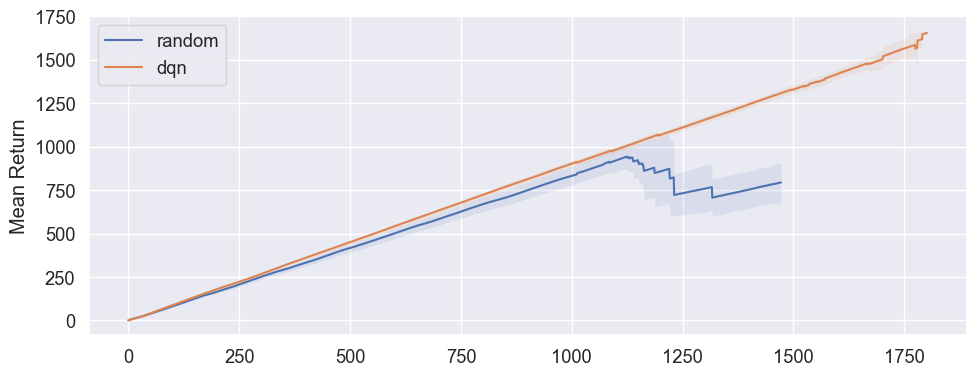

In [63]:
import pandas as pd
fig, ax = plt.subplots(1, 1, figsize=(10, 4), tight_layout=True)

for i, alg in enumerate(rewards.keys()):
    # 1. Collect all episodes for this algorithm into a list
    all_episodes = [rewards[alg][episode] for episode in rewards[alg].keys()]
    
    # 2. Convert to DataFrame (automatically pads shorter episodes with NaN)
    df = pd.DataFrame(all_episodes)
    
    # 3. Calculate mean and std ignoring NaNs
    means = df.mean(axis=0).values
    stds = df.std(axis=0).values
    
    # Calculate count of valid episodes per time step (denom for CI)
    # This is important because fewer episodes exist at later time steps
    counts = df.count(axis=0).values 
    ci = 1.96 * stds / np.sqrt(counts)
    
    # Plotting code...
    ax.plot(means, label=alg)
    ax.fill_between(range(len(means)), means - ci, means + ci, alpha=0.1)
    ax.legend()
    ax.set_ylabel("Mean Return")